# Documentation

In this section, we perform inference on a sample of our invoices using two versions of LayoutLM developed by Impira. To streamline the process, we utilize the Docquery library.

# Installing Libraries

In [ ]:
! pip install docquery
! apt install tesseract-ocr
! pip install transformers
! pip uninstall transformers
! pip install transformers==4.23

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 69.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tess

# Setting the Working Directory

In [ ]:
import os

# set the working directory (this version is created for Google Colab)
my_wd = "/content"
os.chdir(my_wd)
print("Changed working directory to:", os.getcwd())

Changed working directory to: /content


# Mounting Google Drive

In [ ]:
from google.colab import drive

# mount google drive
drive.mount(os.path.join(my_wd,"drive"))

Mounted at /content/drive


# Loading and Unzipping the `Final Invoices Dataset - PNG - Extended`

Here we just loading our dataset that we created on the step 1

In [ ]:
# define the google drive location
drive_location = "drive/MyDrive/Capstone Project/My Capstone/Datasets/Invoices/Final Invoices Dataset - PNG - Extended.zip"

# create the final path
zip_file_path = os.path.join(my_wd, drive_location)

# keep the name of the zipped folder
zip_basename = os.path.splitext(os.path.basename(drive_location))[0]

# unzip the folder
!unzip -q "{zip_file_path}" -d "{zip_basename}"

# Loading the Already Fine Tuned impira/layoutlm-invoices

Below, from the docquery library we import document and pipeline to easily load our model

In [ ]:
from docquery import document, pipeline

p = pipeline(task="document-question-answering", model = "impira/layoutlm-invoices")

document-question-answering is already registered. Overwriting pipeline for task document-question-answering...
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/896 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/511M [00:00<?, ?B/s]

#Inferencing on a Sample of our Dataset

## 1st Example

Display the image

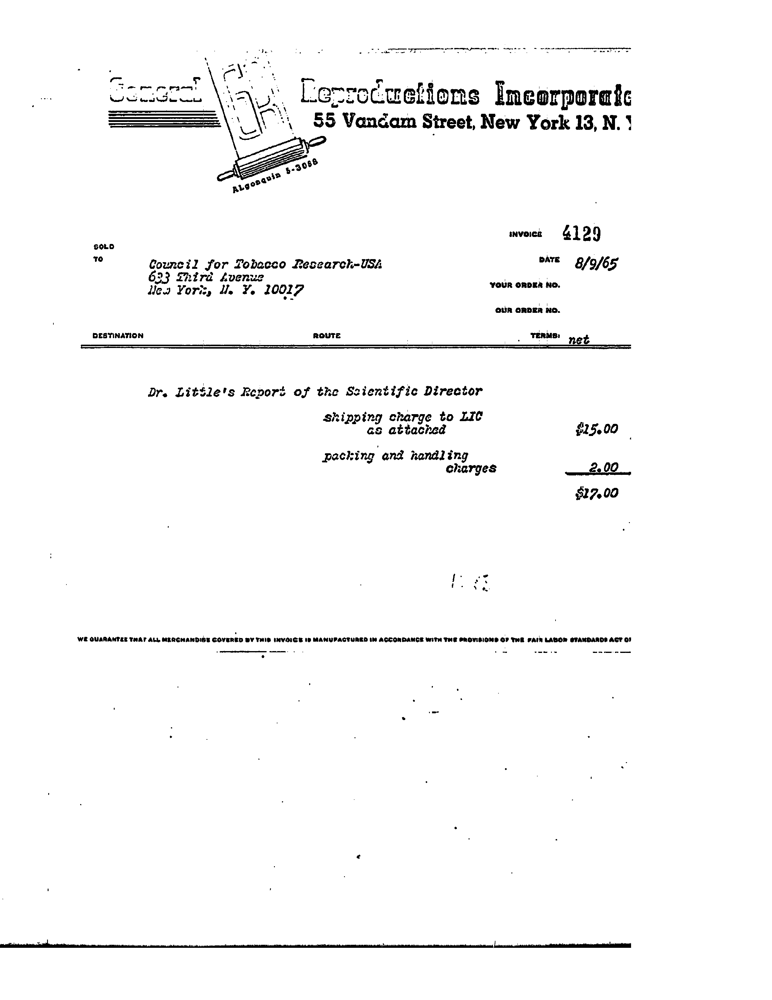

In [ ]:
from IPython.display import Image

# Replace 'your_image.png' with the actual path or URL of your PNG image
image_path = '/content/Final Invoices Dataset - PNG - Extended/10399232.png'

# Display the image
Image(filename=image_path)

In [ ]:
from PIL import Image

# Loading document
doc = document.load_document(image_path)

# Perform inference on the document with a predefined question
total_price_inference = p(question="What is the total price of this invoice?", **doc.context)

# Display the result of the inference
print("Total Price Inference Result:", total_price_inference)

# Perform inference on the document with another predefined question
issue_date_inference = p(question="What is the issue date of this invoice?", **doc.context)

# Display the result of the inference
print("Issue Date Inference Result:", issue_date_inference)

Total Price Inference Result: [{'score': 0.9988247752189636, 'answer': '$27.00', 'word_ids': [50], 'page': 0}]
Issue Date Inference Result: [{'score': 0.9981300830841064, 'answer': '8/9/65.', 'word_ids': [16], 'page': 0}]


## 2nd Example

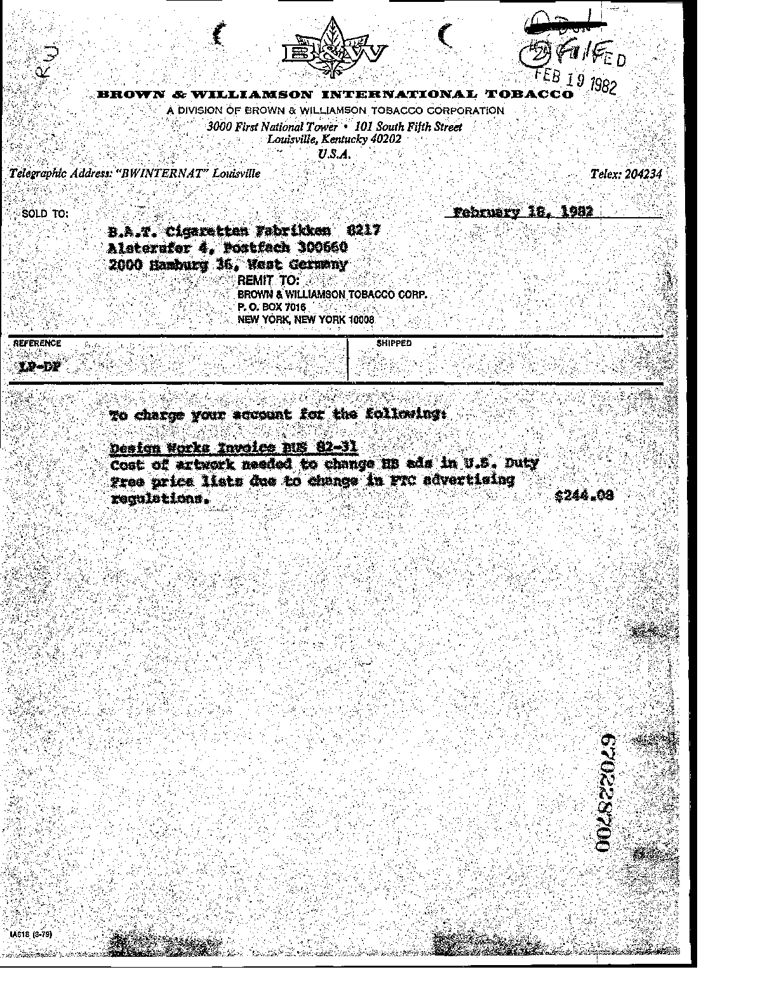

In [ ]:
from IPython.display import Image

# Replace 'your_image.png' with the actual path or URL of your PNG image
image_path = '/content/Final Invoices Dataset - PNG - Extended/0000223394.png'

# Display the image
Image(filename=image_path)

In [ ]:
from PIL import Image

# Loading document
doc = document.load_document(image_path)

# Perform inference on the document with a predefined question
total_price_inference = p(question="What is the total price on this invoice?", **doc.context)

# Display the result of the inference
print("Total Price Inference Result:", total_price_inference)

# Perform inference on the document with another predefined question
issue_date_inference = p(question="What is the issue date on this invoice?", **doc.context)

# Display the result of the inference
print("Issue Date Inference Result:", issue_date_inference)

Total Price Inference Result: [{'score': 0.8468143343925476, 'answer': '$000', 'word_ids': [20], 'page': 0}]
Issue Date Inference Result: [{'score': 1.7855280987078004e-07, 'answer': '+', 'word_ids': [24], 'page': 0}]


## 3rd Example

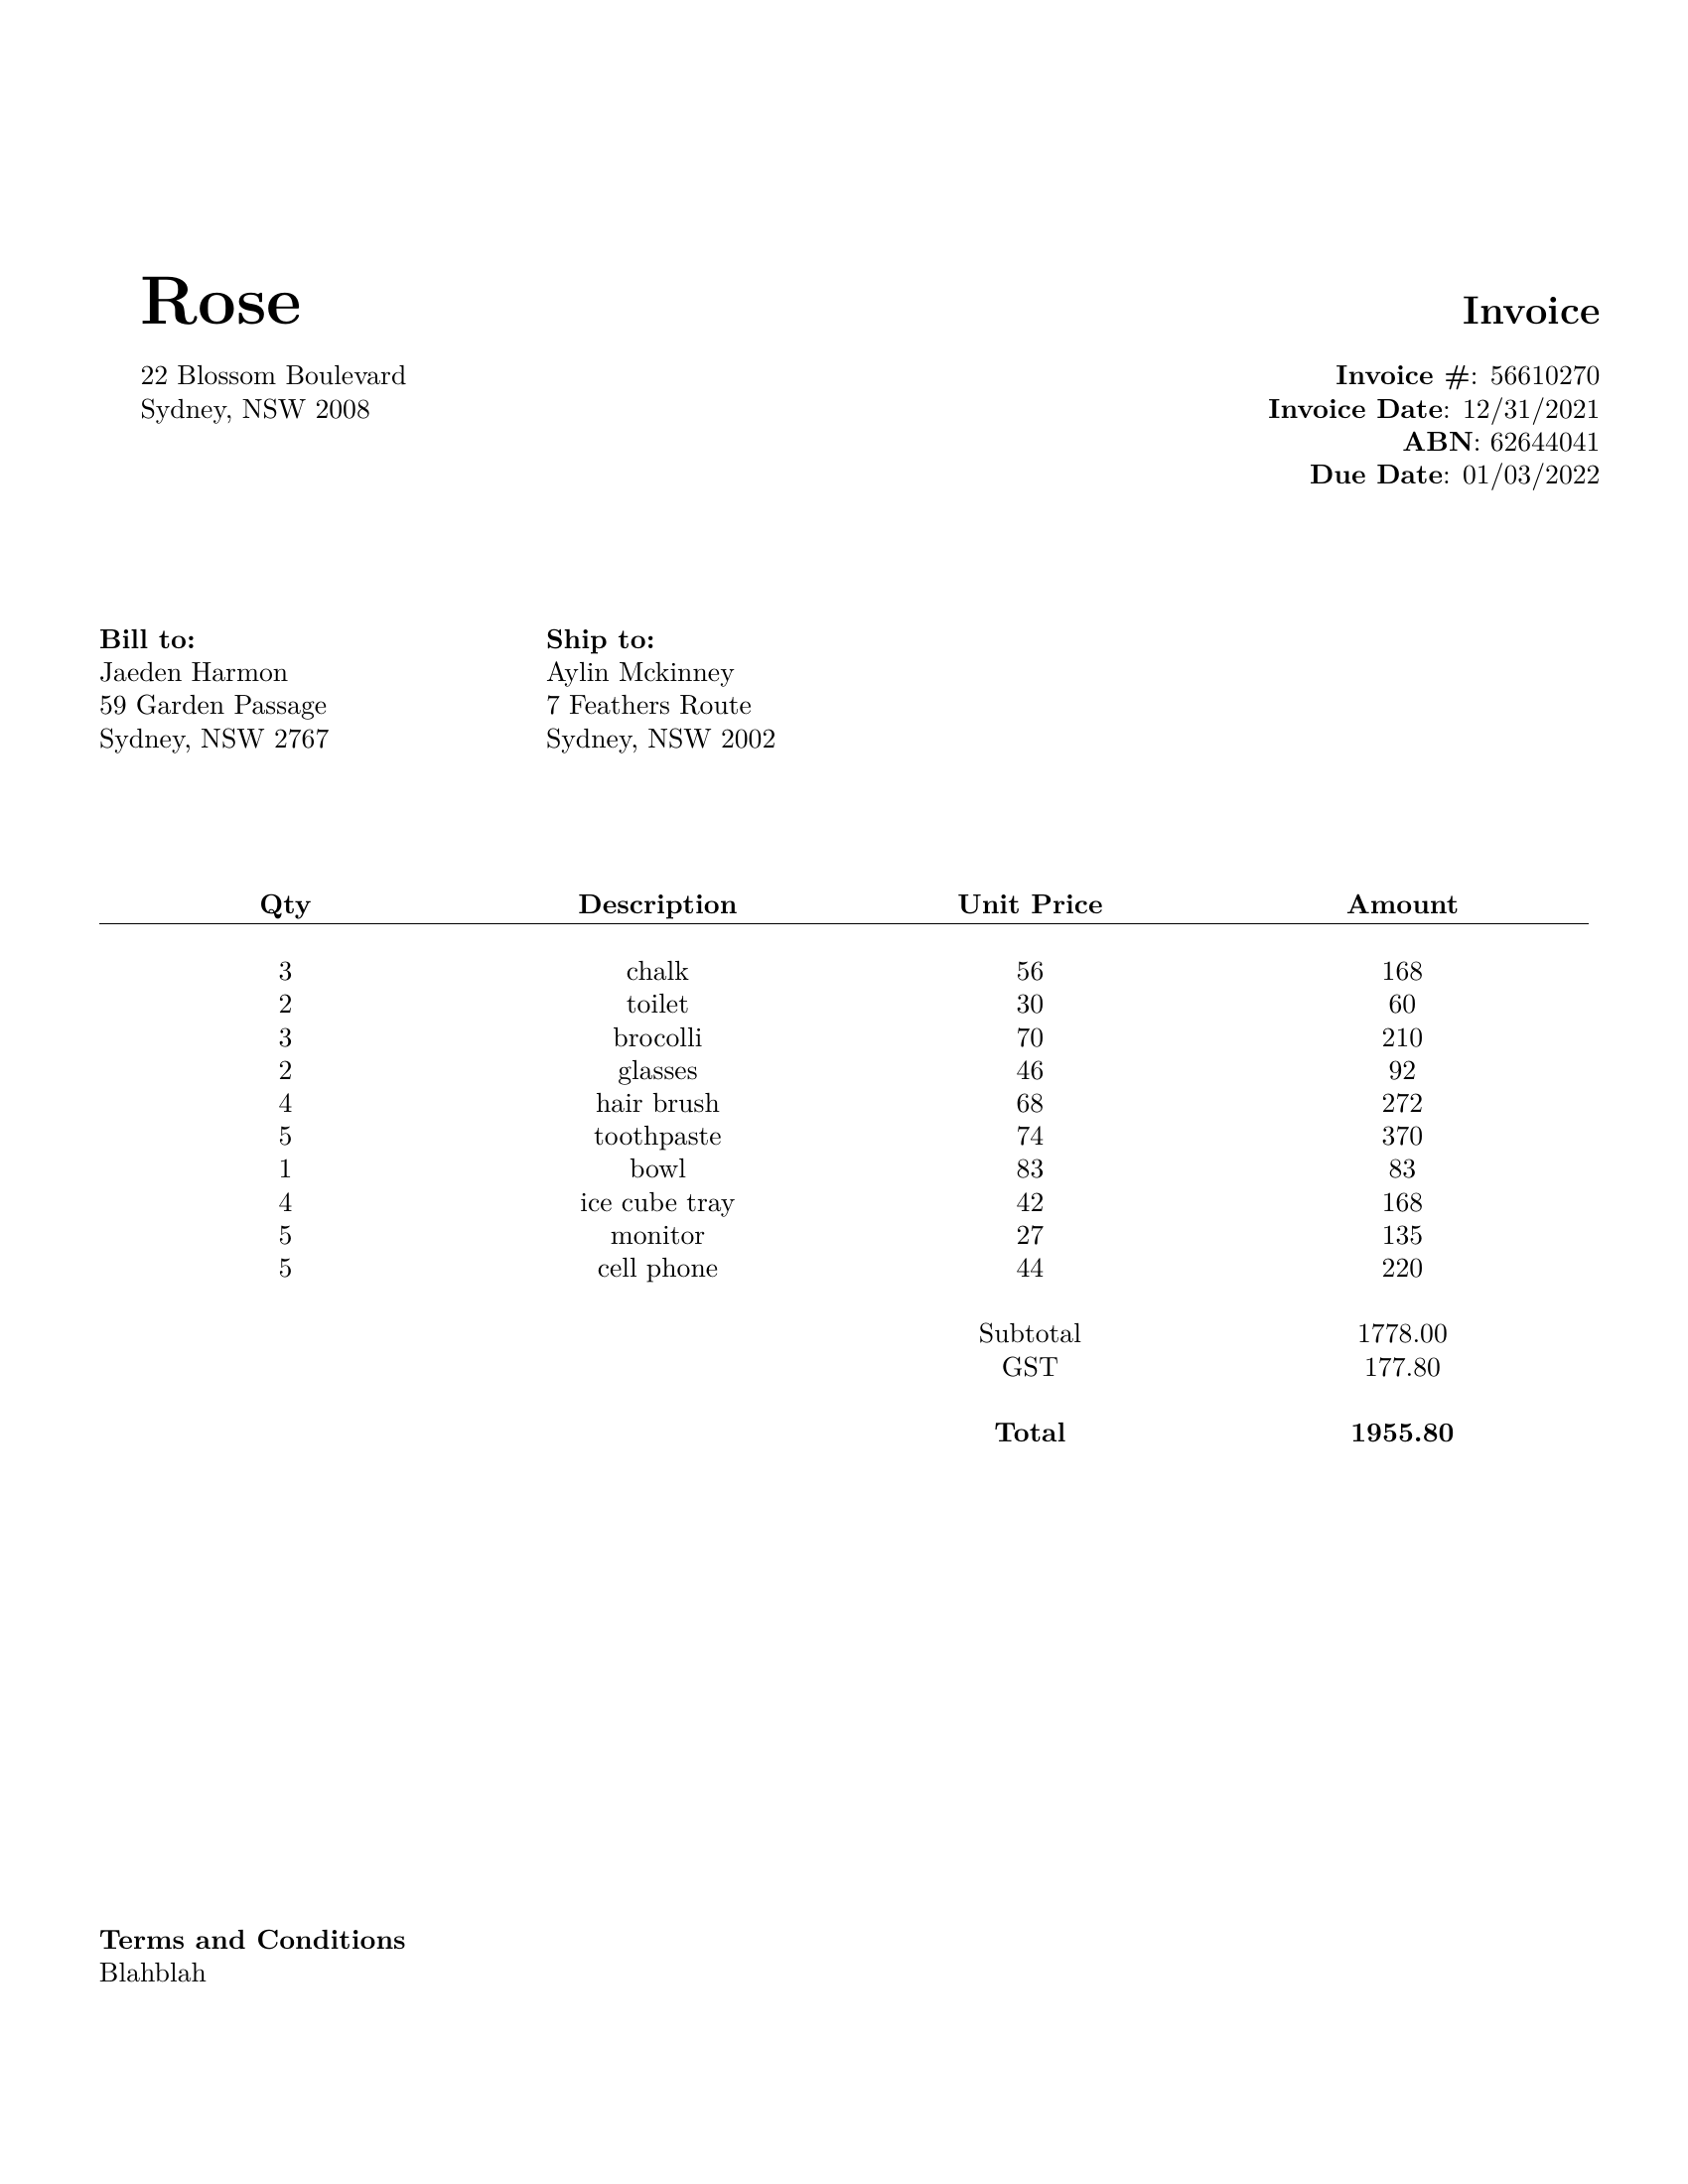

In [ ]:
from IPython.display import Image

# Replace 'your_image.png' with the actual path or URL of your PNG image
image_path = '/content/Final Invoices Dataset - PNG - Extended/image_22.png'

# Display the image
Image(filename=image_path)

In [ ]:
from PIL import Image

# Loading document
doc = document.load_document(image_path)

# Perform inference on the document with a predefined question
total_price_inference = p(question="What is the total price on this invoice?", **doc.context)

# Display the result of the inference
print("Total Price Inference Result:", total_price_inference)

# Perform inference on the document with another predefined question
issue_date_inference = p(question="What is the issue date on this invoice?", **doc.context)

# Display the result of the inference
print("Issue Date Inference Result:", issue_date_inference)


Total Price Inference Result: [{'score': 0.993051290512085, 'answer': '1955.80', 'word_ids': [93], 'page': 0}]
Issue Date Inference Result: [{'score': 0.978357195854187, 'answer': '12/31/2021', 'word_ids': [33], 'page': 0}]


## 4th Example

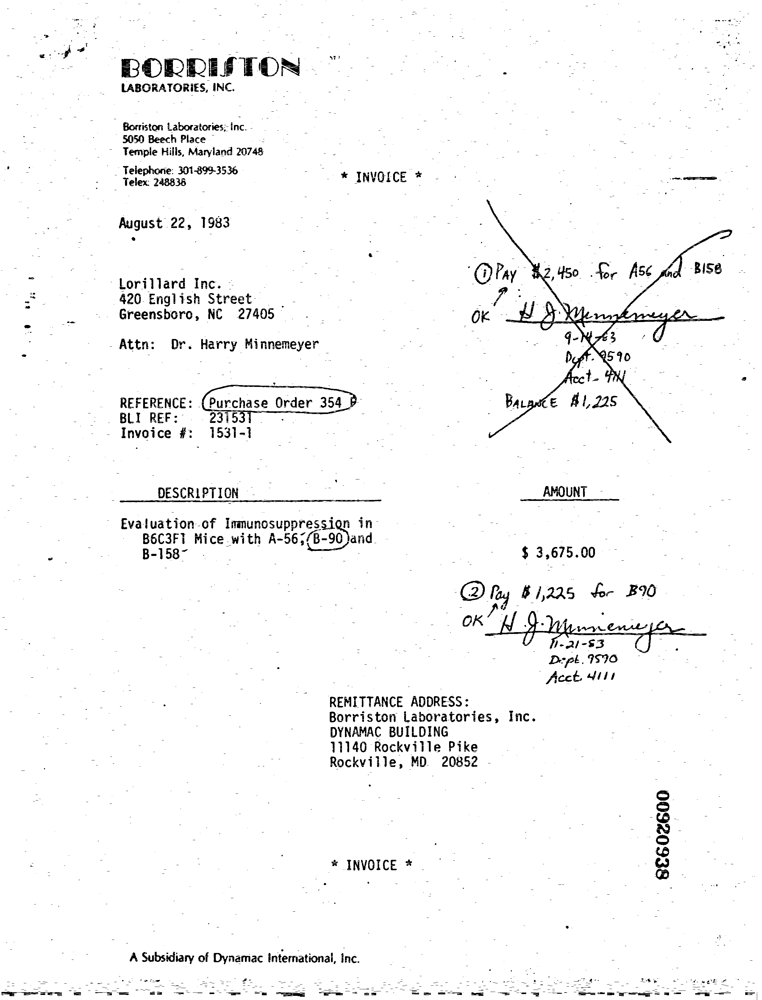

In [ ]:
from IPython.display import Image

# Replace 'your_image.png' with the actual path or URL of your PNG image
image_path = '/content/Final Invoices Dataset - PNG - Extended/00920938_00920940.png'

# Display the image
Image(filename=image_path)

In [ ]:
from PIL import Image

# Loading document
doc = document.load_document(image_path)

# Perform inference on the document with a predefined question
total_price_inference = p(question="What is the total price on this invoice?", **doc.context)

# Display the result of the inference
print("Total Price Inference Result:", total_price_inference)

# Perform inference on the document with another predefined question
issue_date_inference = p(question="What is the issue date on this invoice?", **doc.context)

# Display the result of the inference
print("Issue Date Inference Result:", issue_date_inference)

Total Price Inference Result: [{'score': 0.9600512981414795, 'answer': '$ 3,675.00', 'word_ids': [60, 61], 'page': 0}]
Issue Date Inference Result: [{'score': 0.9999802112579346, 'answer': 'August 22, 1983', 'word_ids': [21, 22, 23], 'page': 0}]


# Loading the Already Fine Tuned impira/layoutlm-document-qa

Below, from the docquery library we import document and pipeline to easily load our model

In [ ]:
from docquery import document, pipeline
p = pipeline(task="document-question-answering", model = "impira/layoutlm-document-qa")

document-question-answering is already registered. Overwriting pipeline for task document-question-answering...
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/511M [00:00<?, ?B/s]

#Inferencing on a Sample of our Dataset

## 1st Example

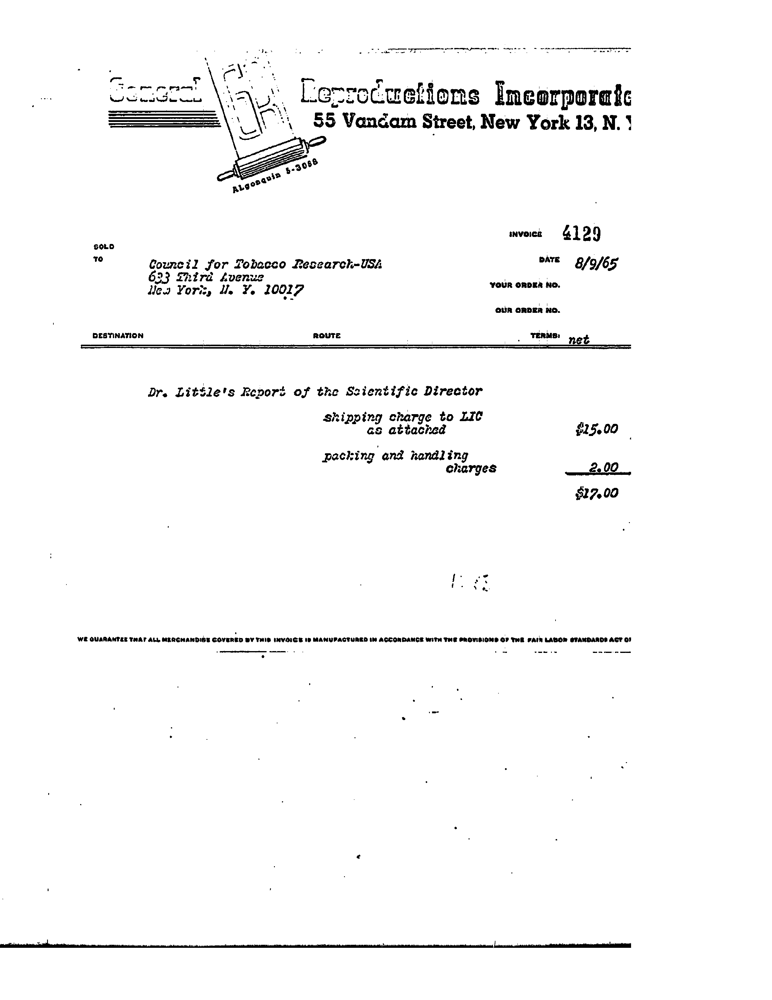

In [ ]:
from IPython.display import Image

# Replace 'your_image.png' with the actual path or URL of your PNG image
image_path = '/content/Final Invoices Dataset - PNG - Extended/10399232.png'

# Display the image
Image(filename=image_path)

In [ ]:
from PIL import Image

# Loading document
doc = document.load_document(image_path)

# Perform inference on the document with a predefined question
total_price_inference = p(question="What is the total price of this invoice?", **doc.context)

# Display the result of the inference
print("Total Price Inference Result:", total_price_inference)

# Perform inference on the document with another predefined question
issue_date_inference = p(question="What is the issue date of this invoice?", **doc.context)

# Display the result of the inference
print("Issue Date Inference Result:", issue_date_inference)

Total Price Inference Result: [{'score': 0.5679957270622253, 'answer': '$27.00', 'word_ids': [50], 'page': 0}]
Issue Date Inference Result: [{'score': 0.999730110168457, 'answer': '8/9/65.', 'word_ids': [16], 'page': 0}]


## 2nd Example

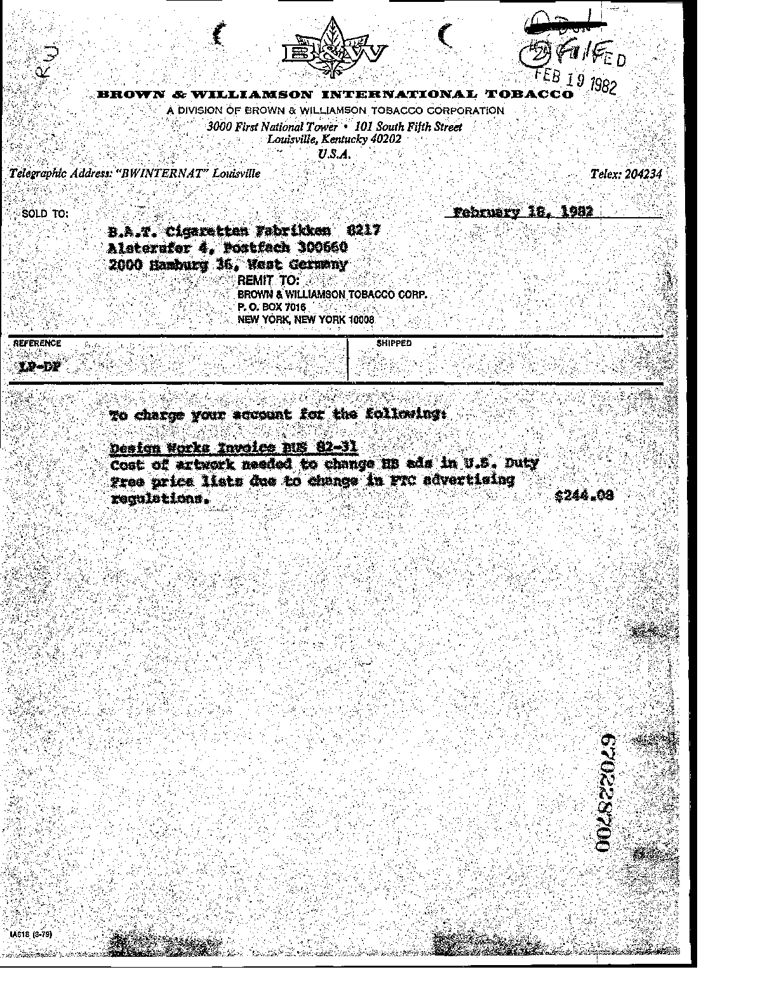

In [ ]:
from IPython.display import Image

# Replace 'your_image.png' with the actual path or URL of your PNG image
image_path = '/content/Final Invoices Dataset - PNG - Extended/0000223394.png'

# Display the image
Image(filename=image_path)

In [ ]:
from PIL import Image

# Loading document
doc = document.load_document(image_path)

# Perform inference on the document with a predefined question
total_price_inference = p(question="What is the total price on this invoice?", **doc.context)

# Display the result of the inference
print("Total Price Inference Result:", total_price_inference)

# Perform inference on the document with another predefined question
issue_date_inference = p(question="What is the issue date on this invoice?", **doc.context)

# Display the result of the inference
print("Issue Date Inference Result:", issue_date_inference)

Total Price Inference Result: [{'score': 0.9967619180679321, 'answer': '$000', 'word_ids': [20], 'page': 0}]
Issue Date Inference Result: [{'score': 7.212540822365554e-07, 'answer': '2', 'word_ids': [9], 'page': 0}]


## 3rd Example

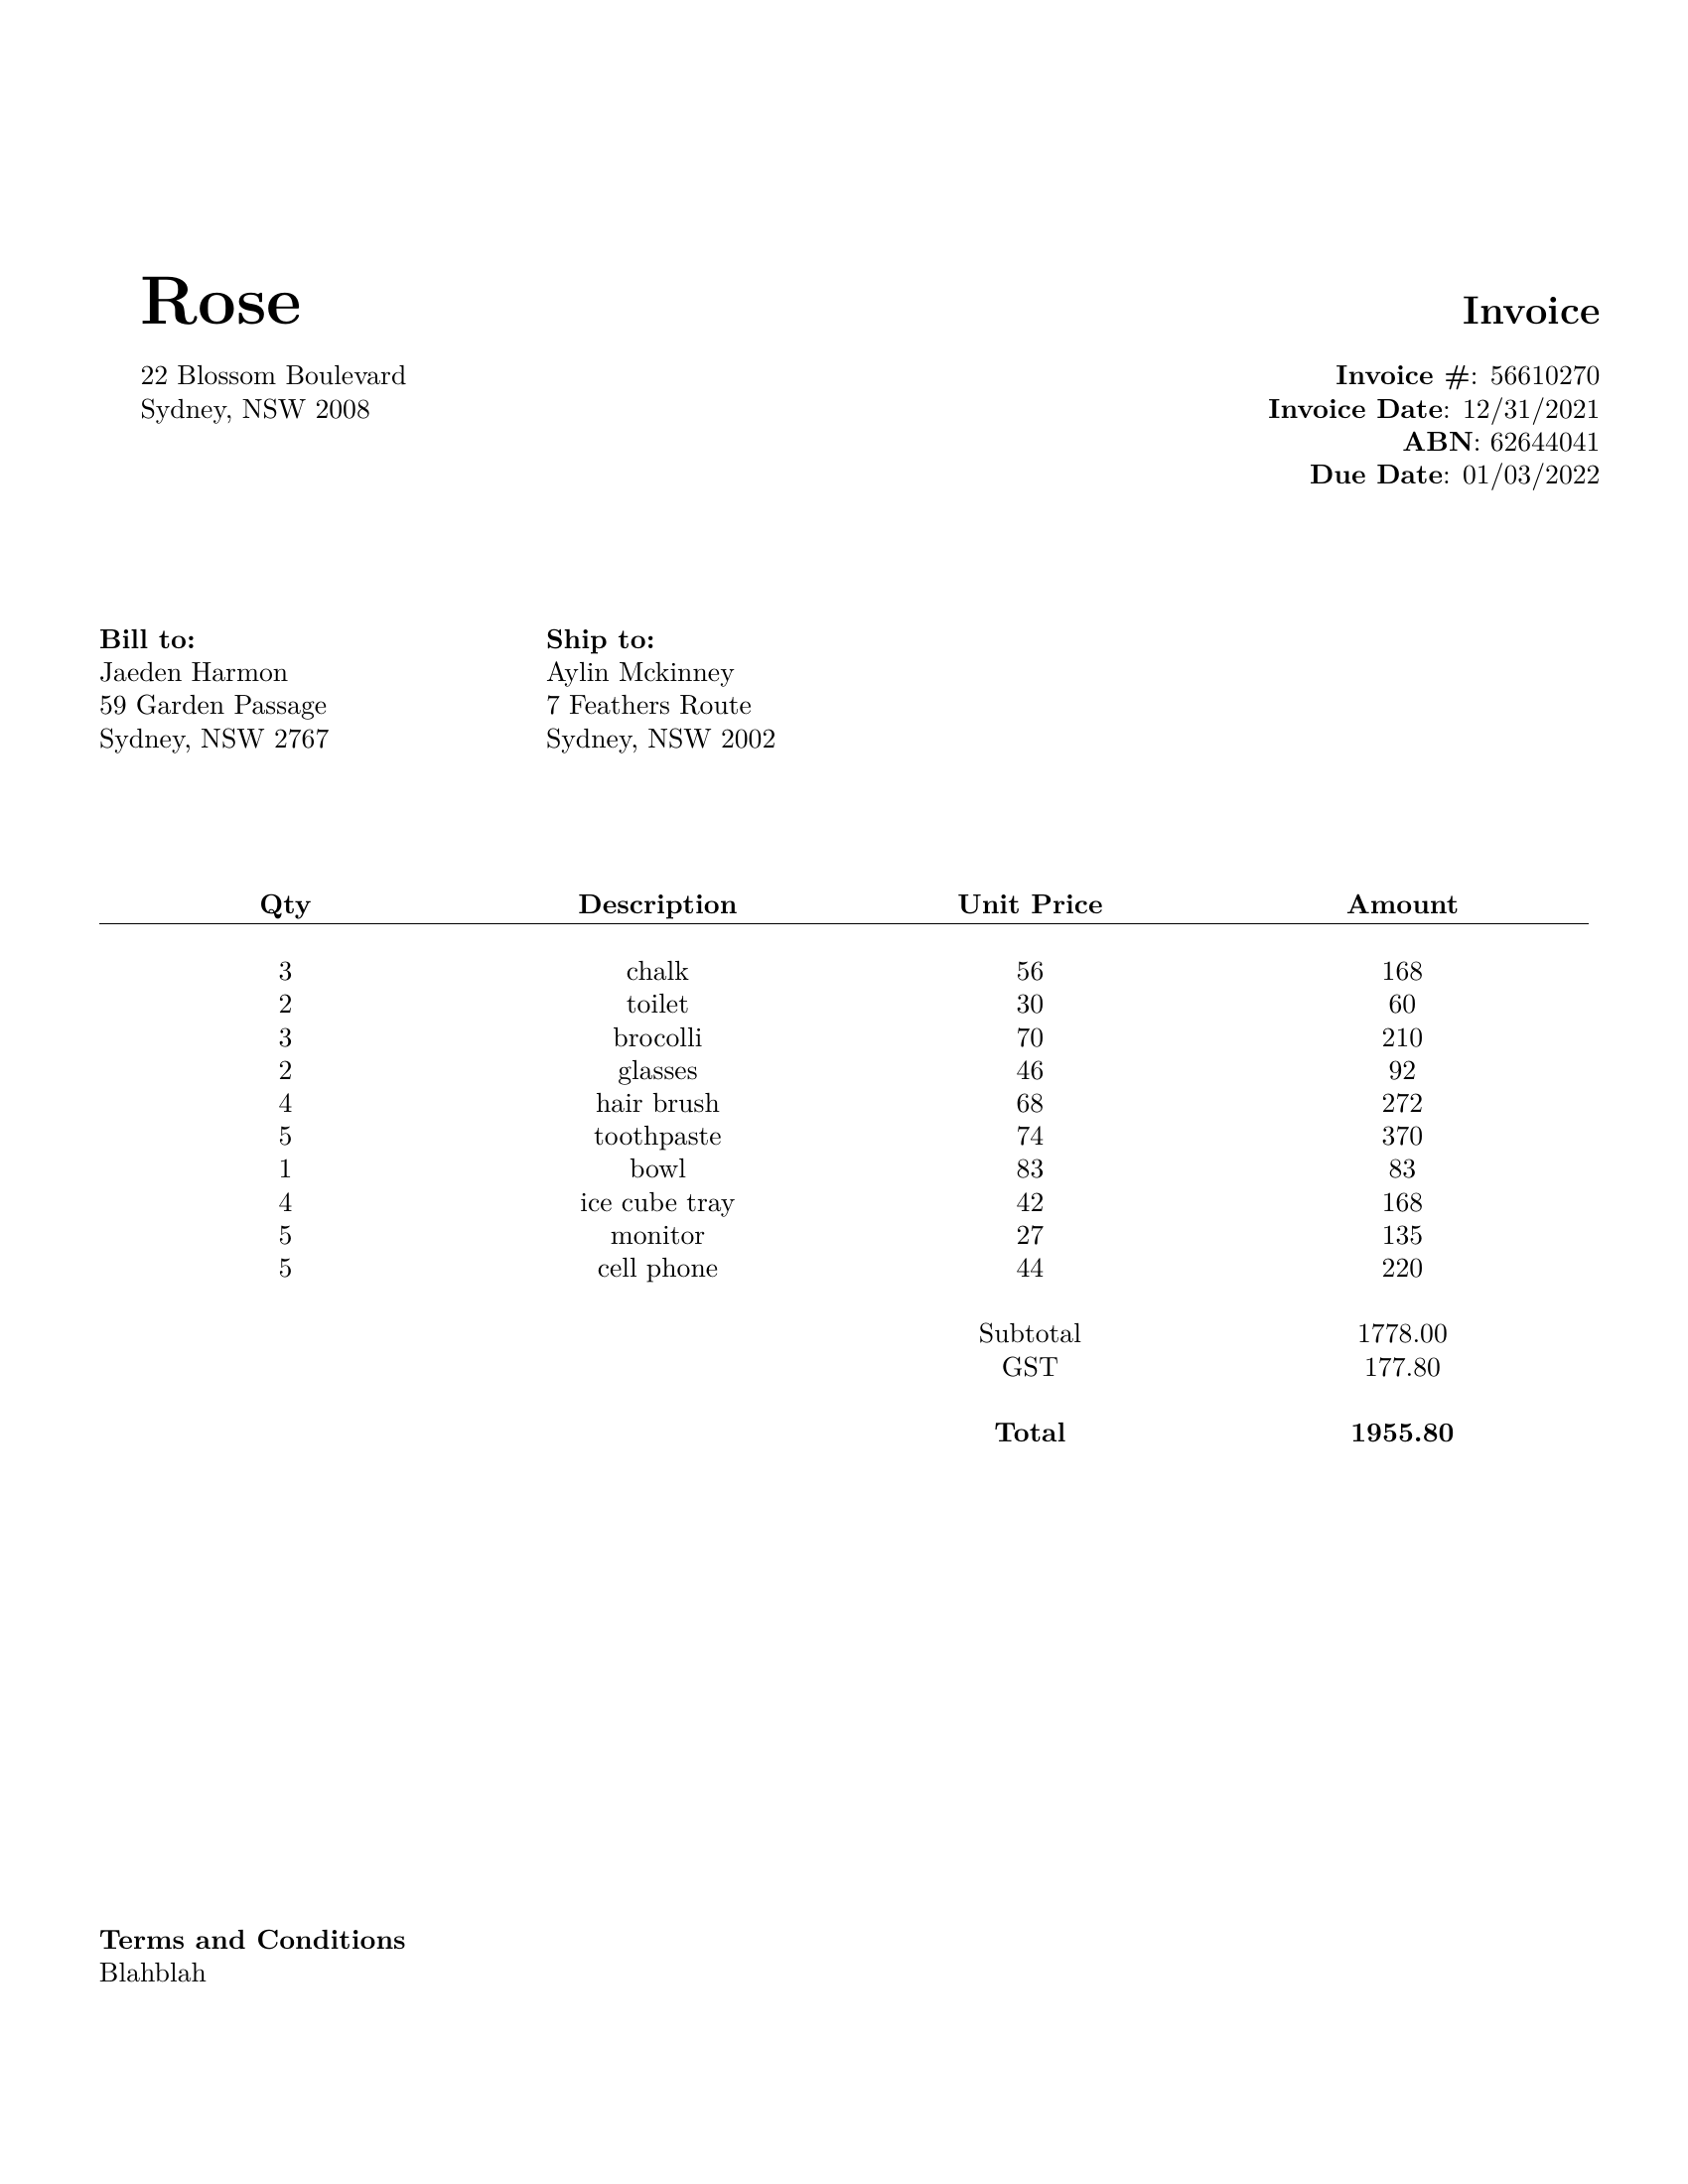

In [ ]:
from IPython.display import Image

# Replace 'your_image.png' with the actual path or URL of your PNG image
image_path = '/content/Final Invoices Dataset - PNG - Extended/image_22.png'

# Display the image
Image(filename=image_path)

In [ ]:
from PIL import Image

# Loading documents
doc = document.load_document(image_path)

# Perform inference on the document with a predefined question
total_price_inference = p(question="What is the total price on this invoice?", **doc.context)

# Display the result of the inference
print("Total Price Inference Result:", total_price_inference)

# Perform inference on the document with another predefined question
issue_date_inference = p(question="What is the issue date on this invoice?", **doc.context)

# Display the result of the inference
print("Issue Date Inference Result:", issue_date_inference)

Total Price Inference Result: [{'score': 0.8810446262359619, 'answer': '1955.80', 'word_ids': [93], 'page': 0}]
Issue Date Inference Result: [{'score': 0.9838613867759705, 'answer': '01/03/2022', 'word_ids': [38], 'page': 0}]


## 4th Example

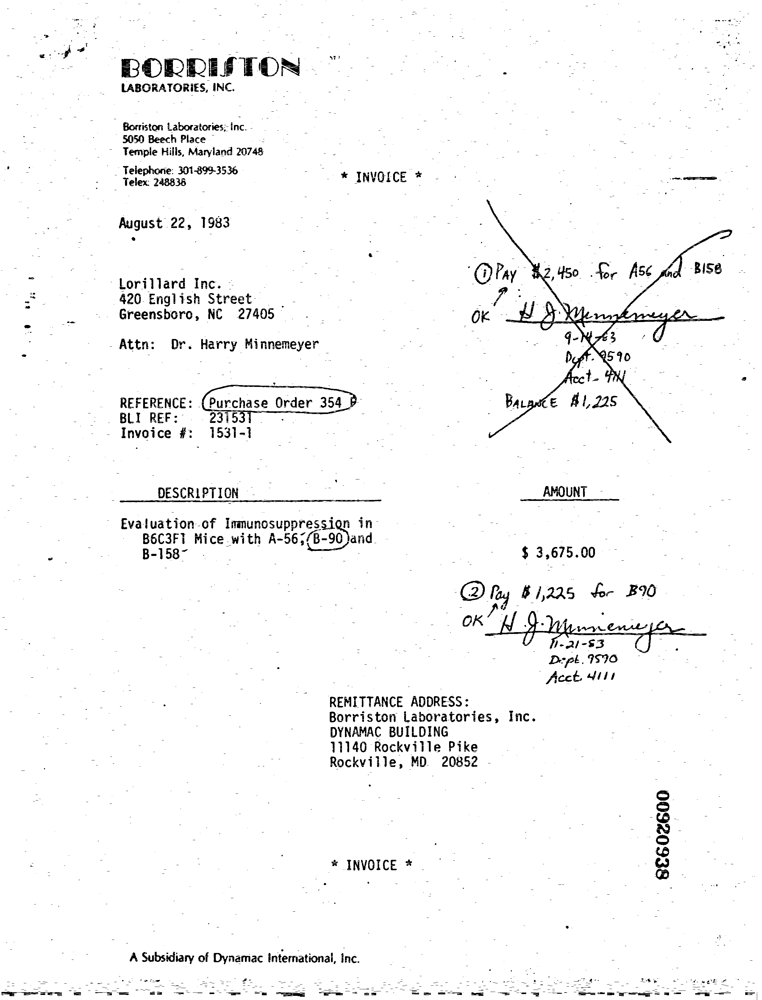

In [ ]:
from IPython.display import Image

# Replace 'your_image.png' with the actual path or URL of your PNG image
image_path = '/content/Final Invoices Dataset - PNG - Extended/00920938_00920940.png'

# Display the image
Image(filename=image_path)

In [ ]:
from PIL import Image

# Loading document
doc = document.load_document(image_path)

# Perform inference on the document with a predefined question
total_price_inference = p(question="What is the total price on this invoice?", **doc.context)

# Display the result of the inference
print("Total Price Inference Result:", total_price_inference)

# Perform inference on the document with another predefined question
issue_date_inference = p(question="What is the issue date on this invoice?", **doc.context)

# Display the result of the inference
print("Issue Date Inference Result:", issue_date_inference)

Total Price Inference Result: [{'score': 0.9989755749702454, 'answer': '$ 3,675.00', 'word_ids': [60, 61], 'page': 0}]
Issue Date Inference Result: [{'score': 0.9995945692062378, 'answer': 'August 22, 1983', 'word_ids': [21, 22, 23], 'page': 0}]
